In [1]:
data_dir = "C:/Coding/Python/machine_learning/term_project"  # 데이터가 저장된 디렉토리 경로

Loading train


100%|██████████| 40/40 [00:00<00:00, 389.39it/s]


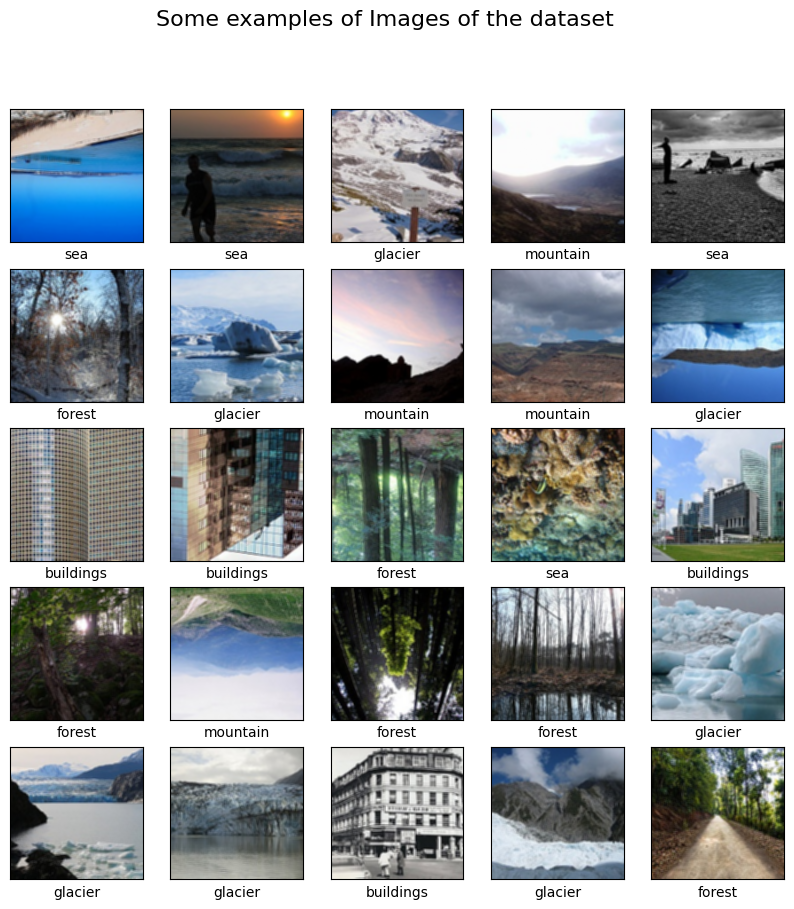

In [2]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

IMAGE_SIZE = (150, 150)

def average_filter(image):
    kernel = np.ones((3, 3), np.float32) / 9
    return cv2.filter2D(image, -1, kernel)

def augment_images(images):
    augmented_images = []
    for image in images:
        augmented_images.append(image)
        augmented_images.append(np.fliplr(image))  # 좌우 반전
        augmented_images.append(np.flipud(image))  # 상하 반전
    return np.array(augmented_images)

def augment_labels(labels):
    augmented_labels = []
    for label in labels:
        augmented_labels.extend([label] * 3)  # 각 이미지에 대해 세 개의 라벨
    return np.array(augmented_labels)

def shuffle_data(images, labels):
    indices = np.arange(images.shape[0])
    np.random.shuffle(indices)
    return images[indices], labels[indices]

def load_data(data_dir, class_names_label):
    datasets = ["train"]
    output = []

    for dataset in datasets:
        images = []
        labels = []

        print("Loading {}".format(dataset))
        # 지정된 데이터 디렉터리 내의 각 폴더(클래스)를 순회
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # 각 폴더 내의 이미지를 순회
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # 이미지를 읽고 크기를 조정
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                
                # 정규화: 0 ~ 255 범위의 픽셀 값을 0 ~ 1 범위로 변환
                image = image / 255

                # 평균 필터 적용
                image = average_filter(image)
                
                images.append(image)
                labels.append(label)
        
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        # 데이터 증강
        images = augment_images(images)
        labels = augment_labels(labels)

        # 데이터 셔플
        images, labels = shuffle_data(images, labels)
        output.append((images, labels))
    return output

data_dir = 'C:/Users/USER/OneDrive/Desktop/머신러닝실습/텀프로젝트/train'  # 데이터가 저장된 디렉토리 경로
class_names_label = {
    'buildings': 0,
    'forest': 1,
    'glacier': 2,
    'mountain': 3,
    'sea': 4
}


output = load_data(data_dir, class_names_label)
#print(f'Train images size: {output[0].shape}, dtype={output[0].dtype}')
#print(f'Train labels size: {output[1].shape}, dtype={output[1].dtype}')


# 전처리 결과 확인을 위한 함수
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of Images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid()
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# 예시 사용법
class_names = {v: k for k, v in class_names_label.items()}
display_examples(class_names, output[0][0], output[0][1]) # output[0][0] : image, output[0][1] : layer

In [3]:
import tensorflow as tf

def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    return model

# 모델 생성
model = create_model(input_shape=(150, 150, 3))

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

Epoch 1/30
20/20 [==============================] - 7s 350ms/step - loss: 0.0280 - accuracy: 0.9979 - val_loss: 1.4385 - val_accuracy: 0.6500
Epoch 2/30
20/20 [==============================] - 6s 317ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 1.5960 - val_accuracy: 0.6250
Epoch 3/30
20/20 [==============================] - 6s 309ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 1.4527 - val_accuracy: 0.6250
Epoch 4/30
20/20 [==============================] - 6s 308ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.7526 - val_accuracy: 0.5917
Epoch 5/30
20/20 [==============================] - 6s 324ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8029 - val_accuracy: 0.6417
Epoch 6/30
20/20 [==============================] - 6s 304ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.6483 - val_accuracy: 0.6417
Epoch 7/30
20/20 [==============================] - 6s 307ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.7136 - val_accuracy: 0.6500
Epoch 

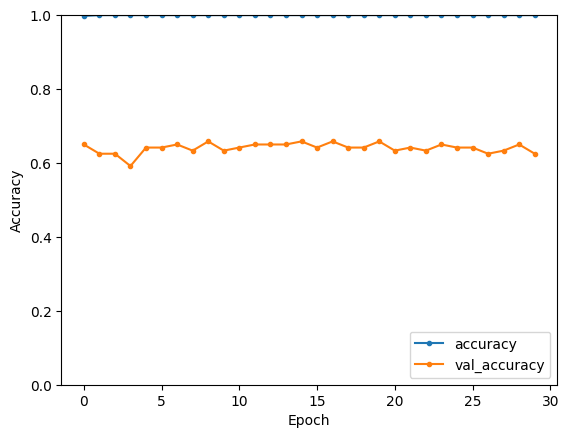

In [5]:
# 모델 학습
history = model.fit(output[0][0], output[0][1], epochs=30, batch_size=25, validation_split=0.2)

# 학습 결과 시각화
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'],marker = ".", label='accuracy')
    plt.plot(history.history['val_accuracy'], marker = ".",label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

plot_history(history)

In [ ]:

def evaluate_model(model, test_images, test_labels):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    predictions = model.predict(test_images)
    return predictions


# 테스트 데이터 로드
test_data_dir = 'C:/Users/USER/OneDrive/Desktop/train'  # 테스트 데이터가 저장된 디렉토리 경로
test_outputs = load_data(test_data_dir, class_names_label)

# 모델 평가
predictions = evaluate_model(model, test_outputs[0][0], test_outputs[0][1])

# 학습 결과 시각화
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

plot_history(history)

Loading train


100%|██████████| 40/40 [00:00<00:00, 1194.58it/s]


NameError: name 'evaluate_model' is not defined

In [ ]:
#model.save("2020144011_psw.h5")